In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Plotting a single population line**

In [4]:
# adding a seed for reproduciblity of results
np.random.seed(42)
def get_X_Y(n_samples):
    # loc = mean of the distribution
    # scale = standard deviation of the normal distribution
    X_samples = np.random.normal(loc = 1.0, scale = 1 ,size = 100)
    error_samples = np.random.normal(loc = 0.0, scale = 1 ,size = 100)
    beta_values = [3,2]
    # the model for Y reads Y = 3 + 2X + error
    Y_samples = beta_values[0]  + beta_values[1] * X_samples + error_samples  

    return X_samples, Y_samples, beta_values

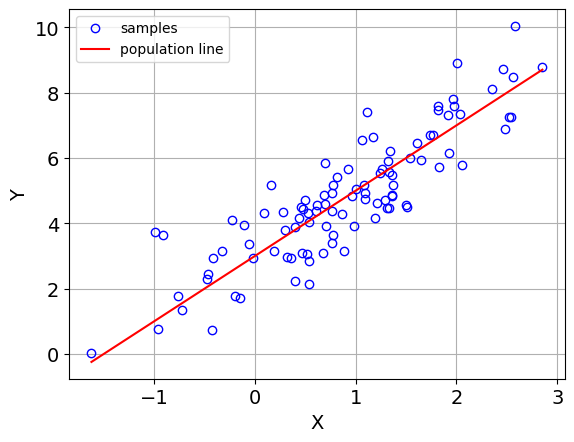

In [5]:
X_samples,Y_samples,beta_values = get_X_Y(n_samples=100)
plt.plot(X_samples,Y_samples,'o',ms=6, markerfacecolor="None",
         markeredgecolor='blue', markeredgewidth=1,label = "samples")
plt.plot(np.sort(X_samples),np.sort(X_samples) * beta_values[1] + beta_values[0],'-r',label = "population line")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.grid()
plt.savefig('population_line.png', bbox_inches='tight')
plt.show()

**Plotting two population lines.**

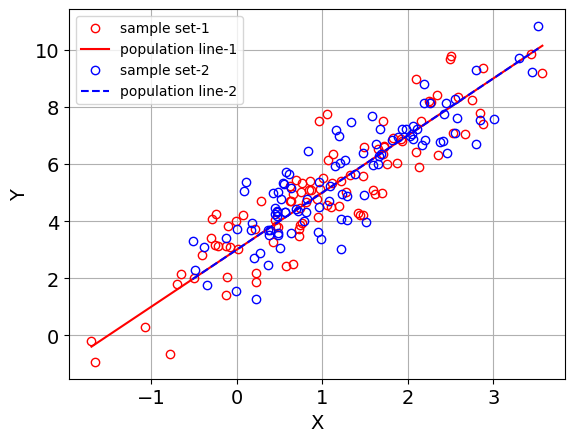

In [20]:
X_samples1,Y_samples1,beta_values = get_X_Y(n_samples=100)
X_samples2,Y_samples2,beta_values = get_X_Y(n_samples=100)

plt.plot(X_samples1,Y_samples1,'o',ms=6, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1,label = "sample set-1")
plt.plot(np.sort(X_samples1),np.sort(X_samples1) * beta_values[1] + beta_values[0],'-r',label = "population line-1")
plt.plot(X_samples2,Y_samples2,'o',ms=6, markerfacecolor="None",
         markeredgecolor='blue', markeredgewidth=1,label = "sample set-2")
plt.plot(np.sort(X_samples2),np.sort(X_samples2) * beta_values[1] + beta_values[0],'--b',label = "population line-2")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.grid()
plt.savefig('population_line_two_datasets.png', bbox_inches='tight')
plt.show()


**Plotting linear regression line**

In [29]:
reg_sample1 = LinearRegression().fit(np.expand_dims(X_samples1,axis=1), Y_samples1)
reg_samples2 = LinearRegression().fit(np.expand_dims(X_samples2,axis=1), Y_samples2)
Y_output_1 = reg_sample1.predict(np.expand_dims(np.sort(X_samples1),axis=1))
Y_output_2 = reg_samples2.predict(np.expand_dims(np.sort(X_samples2),axis=1))

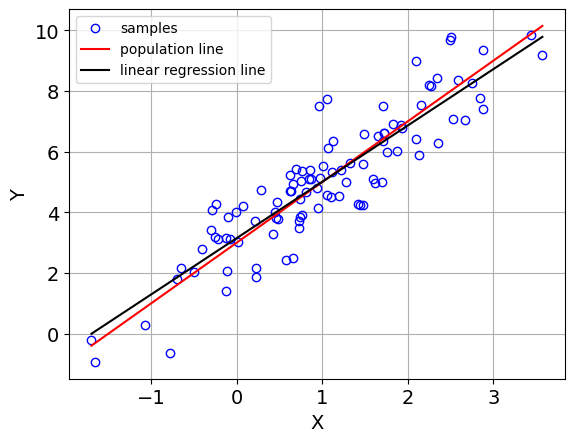

In [26]:
plt.plot(X_samples1,Y_samples1,'o',ms=6, markerfacecolor="None",
         markeredgecolor='blue', markeredgewidth=1,label = "samples")
plt.plot(np.sort(X_samples1),np.sort(X_samples1) * beta_values[1] + beta_values[0],'-r',label = "population line")
plt.plot(np.sort(X_samples1),Y_output_1,'-k',label = "linear regression line")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.grid()
plt.savefig('regression_line.png', bbox_inches='tight')
plt.show()

**plotting regression line for two datasets**

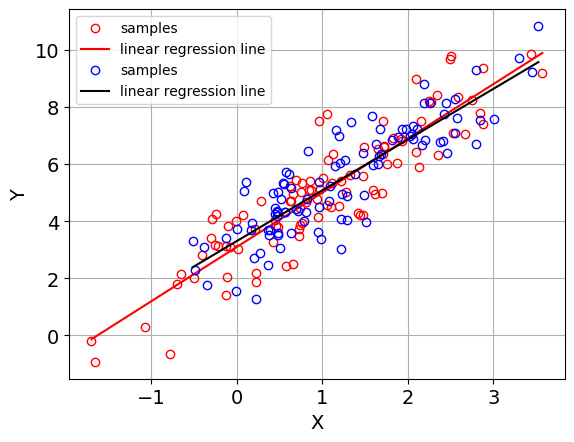

In [30]:
# data samples set-1
plt.plot(X_samples1,Y_samples1,'o',ms=6, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1,label = "samples")
plt.plot(np.sort(X_samples1),Y_output_1,'-r',label = "linear regression line-1")

# data samples set-2
plt.plot(X_samples2,Y_samples2,'o',ms=6, markerfacecolor="None",
         markeredgecolor='blue', markeredgewidth=1,label = "samples")
plt.plot(np.sort(X_samples2),Y_output_2,'-k',label = "linear regression line-2")

plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.grid()
plt.savefig('regression_line_two_datasets.png', bbox_inches='tight')
plt.show()

**100 different runs**

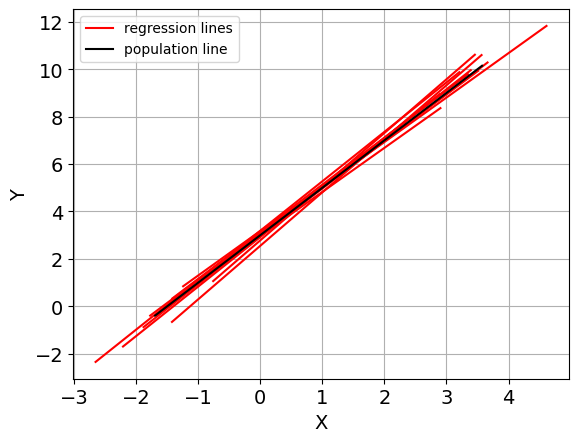

In [32]:
n_trials = 10
for trial in range(n_trials):
    X_trial,Y_trial,beta_values = get_X_Y(n_samples=100)
    lin_fit = LinearRegression().fit(np.expand_dims(X_trial,axis=1), Y_trial)
    line_predict = lin_fit.predict(np.expand_dims(np.sort(X_trial),axis=1))
    if trial == 0:
        plt.plot(np.sort(X_trial),line_predict,'-r',label = "regression lines")
    else:
        plt.plot(np.sort(X_trial),line_predict,'-r')

plt.plot(np.sort(X_samples1),np.sort(X_samples1) * beta_values[1] + beta_values[0],'-k',label = "population line")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.grid()
plt.savefig('averaged_line.png', bbox_inches='tight')
plt.show()
    